In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

STARTING_RANGE_PARAMETER = 0.1 # In [fm^-2]
ENDING_RANGE_PARAMETER = 25
SUM_LIMIT = 20 # Determines the number of gaussians we expand our wave function to

Import eigenvectors from csv files for the eigenstates

In [19]:
eigenvector_0S = np.genfromtxt('0S_eigenvector.txt', delimiter=' ')
eigenvector_1S = np.genfromtxt('1S_eigenvector.txt', delimiter=' ')
eigenvector_0P12 = np.genfromtxt('0P_12_eigenvector.txt', delimiter=' ')
eigenvector_0P32 = np.genfromtxt('0P_32_eigenvector.txt', delimiter=' ')


Define the functions used in the plotting

In [20]:
def plotting_wavefunction_functions(x_values, wavefunction_eigenvector, orbital_quantum_number, sum_limit=SUM_LIMIT):
    wavefunction_vals = np.zeros(shape=(1, len(x_values)))[0, :]

    for i in range(len(x_values)):
        for j in range(sum_limit):
            range_parameter = next_range_parameter(j)
            wavefunction_vals[i] += (wavefunction_eigenvector[j] * gaussian_wavefunction(x_values[i], 
                range_parameter, orbital_quantum_number))
        wavefunction_vals[i] = wavefunction_vals[i]**2
    return wavefunction_vals

def next_range_parameter(i, starting_range_parameter=STARTING_RANGE_PARAMETER, ending_range_parameter=ENDING_RANGE_PARAMETER,
                         sum_limit=SUM_LIMIT):
    geometric_progression_number = (ending_range_parameter / starting_range_parameter)**(1 / (sum_limit - 1))
    new_range_parameter = starting_range_parameter * geometric_progression_number**(i)

    return new_range_parameter

def gaussian_wavefunction(radius, range_parameter, orb_ang_momentum):
    normalisation = (2**(-2.5 - orb_ang_momentum) * (range_parameter)**(3 + 2 * orb_ang_momentum) * gamma(1.5 + orb_ang_momentum))**(-0.5)
    return normalisation * radius**(orb_ang_momentum) * np.exp(- (radius / range_parameter)**2)

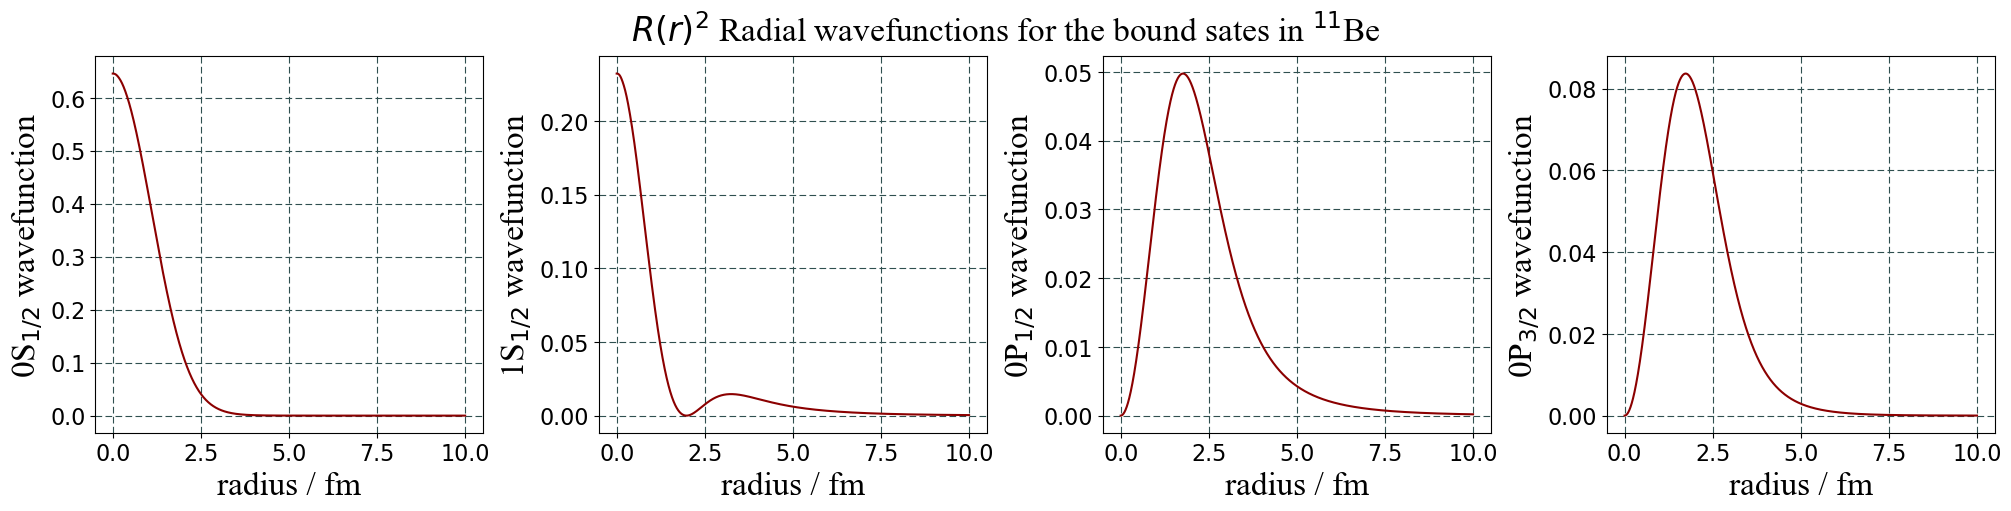

In [41]:
fig = plt.figure(figsize=(20,5), layout='constrained')
spec = fig.add_gridspec(ncols=4, nrows=1)
ax_1 = fig.add_subplot(spec[0, 0])
ax_2 = fig.add_subplot(spec[0, 1])
ax_3 = fig.add_subplot(spec[0, 2])
ax_4 = fig.add_subplot(spec[0, 3])

x_values = np.linspace(0., 10, 3000)
font_size_variable = 24
tick_size_variable = 16

#ax_1.set_title(f'Plot of R(r)^2 as a function of radius for 0S1/2 state')
ax_1.set_xlabel('radius / fm', fontsize=font_size_variable, fontname='Times New Roman')
ax_1.set_ylabel(r'0S$_{1/2}$ wavefunction', fontsize=font_size_variable, fontname='Times New Roman')
ax_1.plot(x_values, plotting_wavefunction_functions(x_values, eigenvector_0S, 0), color='darkred')
ax_1.grid(color='darkslategrey', dashes=[6, 3, 6, 3])
ax_1.tick_params(axis='both', labelsize=tick_size_variable)

#ax_2.set_title(f'Plot of R(r)^2 as a function of radius for 1S1/2 state')
ax_2.set_xlabel('radius / fm', fontsize=font_size_variable, fontname='Times New Roman')
ax_2.set_ylabel(r'1S$_{1/2}$ wavefunction', fontsize=font_size_variable, fontname='Times New Roman')
ax_2.plot(x_values, plotting_wavefunction_functions(x_values, eigenvector_1S, 0), color='darkred')
ax_2.grid(color='darkslategrey', dashes=[6, 3, 6, 3])
ax_2.tick_params(axis='both', labelsize=tick_size_variable)

#ax_3.set_title(f'Plot of R(r)^2 as a function of radius for 0P1/2 state')
ax_3.set_xlabel('radius / fm', fontsize=font_size_variable, fontname='Times New Roman')
ax_3.set_ylabel(r'0P$_{1/2}$ wavefunction', fontsize=font_size_variable, fontname='Times New Roman')
ax_3.plot(x_values, plotting_wavefunction_functions(x_values, eigenvector_0P12, 1), color='darkred')
ax_3.grid(color='darkslategrey', dashes=[6, 3, 6, 3])
ax_3.tick_params(axis='both', labelsize=tick_size_variable)

#ax_4.set_title(f'Plot of R(r)^2 as a function of radius for 0P3/2 state')
ax_4.set_xlabel('radius / fm', fontsize=font_size_variable, fontname='Times New Roman')
ax_4.set_ylabel(r'0P$_{3/2}$ wavefunction', fontsize=font_size_variable, fontname='Times New Roman')
ax_4.plot(x_values, plotting_wavefunction_functions(x_values, eigenvector_0P32, 1), color='darkred')
ax_4.grid(color='darkslategrey', dashes=[6, 3, 6, 3])
ax_4.tick_params(axis='both', labelsize=tick_size_variable)

fig.suptitle(r'$R(r)^{2}$ Radial wavefunctions for the bound sates in $^{11}$Be', fontsize=font_size_variable, fontname='Times New Roman')
plt.savefig('wavefunction_plot_for_report.png', dpi=300)
plt.show()